In [1]:
import pandas as pd
import numpy as np

In [2]:
# AUTHENTICATION and APIs
# import tweepy
# consumerKey = “Type your consumer key here”
# consumerSecret = “Type your consumer secret here”
# accessToken = “Type your accedd token here”
# accessTokenSecret = “Type your access token secret here”
# auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
# auth.set_access_token(accessToken, accessTokenSecret)
# api = tweepy.API(auth)

In [3]:
# STANDARD DATABASE - https://www.kaggle.com/datasets/kazanova/sentiment140
# 2 things - text and target

In [4]:
##### DATA GATHERING #####

In [5]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('project.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head(900000)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
899995,4,1693956088,Mon May 04 00:27:13 PDT 2009,NO_QUERY,FelineBred,"@jvdouglas haha, no, the remark on maternity ..."
899996,4,1693956096,Mon May 04 00:27:14 PDT 2009,NO_QUERY,softthistle,@altitis and to you!
899997,4,1693956099,Mon May 04 00:27:14 PDT 2009,NO_QUERY,elysion32,Okie doke!! Time for me to escape for the Nort...
899998,4,1693956134,Mon May 04 00:27:14 PDT 2009,NO_QUERY,fancyjessy,"finished the lessons, hooray!"


In [6]:
df['target'].unique().tolist()

[0, 4]

In [7]:
print('length of data is', len(df))

length of data is 1600000


In [8]:
df.shape 

(1600000, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
np.sum(df.isnull().any(axis=1))

0

In [11]:
df['target'].unique()

array([0, 4], dtype=int64)

In [12]:
df['target'].nunique()

2

In [13]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [14]:
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

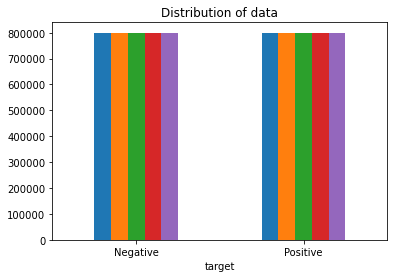

In [15]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists
text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

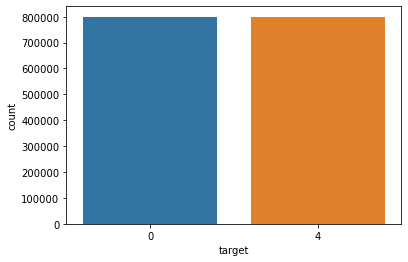

In [16]:
sns.countplot(x='target', data=df)

In [17]:
###### DATA CLEANING ######

In [18]:
# Data cleaning
data=df[['text','target']]
data['target'] = data['target'].replace(4,1)
data['target'].unique()

C:\Users\Manav Singh\AppData\Local\Temp\ipykernel_9340\3866370294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


array([0, 1], dtype=int64)

In [19]:
# Separating positive and negative tweets
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
print(data_pos)
print(data_neg)

                                                      text  target
800000        I LOVE @Health4UandPets u guys r the best!!        1
800001   im meeting up with one of my besties tonight! ...       1
800002   @DaRealSunisaKim Thanks for the Twitter add, S...       1
800003   Being sick can be really cheap when it hurts t...       1
800004     @LovesBrooklyn2 he has that effect on everyone        1
...                                                    ...     ...
1599995  Just woke up. Having no school is the best fee...       1
1599996  TheWDB.com - Very cool to hear old Walt interv...       1
1599997  Are you ready for your MoJo Makeover? Ask me f...       1
1599998  Happy 38th Birthday to my boo of alll time!!! ...       1
1599999  happy #charitytuesday @theNSPCC @SparksCharity...       1

[800000 rows x 2 columns]
                                                     text  target
0       @switchfoot http://twitpic.com/2y1zl - Awww, t...       0
1       is upset that he can't update

In [20]:
# Making text in lower case for consistency
dataset = pd.concat([data_neg , data_pos])
dataset['text']=dataset['text'].str.lower()
#print(len(dataset['text']))
dataset['text'].tail()

1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

In [21]:
# trying to remove stopwords - common words with no conclusiveness
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [22]:
a = "im meeting up with one of my besties tonight!"
b = [w for w in a.split() if w not in stopwordlist]
c = ' '.join(b)
a.split()

['im', 'meeting', 'up', 'with', 'one', 'of', 'my', 'besties', 'tonight!']

In [23]:
# removing stop words using lambda
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].tail()

1599995                 woke up. no school best feeling ever
1599996    thewdb.com - cool hear old walt interviews! â...
1599997                     ready mojo makeover? ask details
1599998    happy 38th birthday boo alll time!!! tupac ama...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

In [24]:
import string
english_punctuations = string.punctuation
english_punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
'siddiq raza'

'siddiq raza'

In [26]:
# cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [27]:
# cleaning and removing repeating characters
import re # to implement lamba functionality - read regular expressions
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [28]:
# cleaning URL's
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [29]:
# cleaning numbers -> as it doesn't provide sentiment to us
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

1599995                  woke up no school best feeling ever
1599996    thewdbcom  cool hear old walt interviews â« h...
1599997                      ready mojo makeover ask details
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [30]:
def tokenization(text):
    text = re.split('\W+', text)
    return text
dataset['text'] = dataset['text'].apply(lambda x: tokenization(x.lower()))
dataset['text'].tail()

1599995          [woke, up, no, school, best, feeling, ever]
1599996    [thewdbcom, cool, hear, old, walt, interviews,...
1599997                [ready, mojo, makeover, ask, details]
1599998    [happy, th, birthday, boo, alll, time, tupac, ...
1599999    [happy, charitytuesday, thenspcc, sparkscharit...
Name: text, dtype: object

In [31]:
# Stemming -> reduce words to base words for sentiment conversion
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].tail()

1599995          [woke, up, no, school, best, feeling, ever]
1599996    [thewdbcom, cool, hear, old, walt, interviews,...
1599997                [ready, mojo, makeover, ask, details]
1599998    [happy, th, birthday, boo, alll, time, tupac, ...
1599999    [happy, charitytuesday, thenspcc, sparkscharit...
Name: text, dtype: object

In [32]:
##### DATA VISUALISATION #####

In [33]:
# Separating input feature and label
X=dataset['text']
y=dataset['target']
#print(len(X))
#print(len(y))


In [34]:
##### BUILDING TESTING AND TRAINING DATA #####

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
X = pd.DataFrame(X)

In [37]:
X = X['text'].apply(lambda x : " ".join(x))

In [38]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state = 26105111)

In [39]:
X_train

177690         paniccrew still no michigan shows wheres love
270490         rebekahnew want see phone sold iphone evening
272624     akayoungin ohkohk booked put june st not may l...
1378251    austinhurst hear its amazing pulls no punches ...
825497                    oh ron white time bed now methinks
                                 ...                        
724937                     nigga wanna go homeaint home days
1201868                                 watching hockey game
521390     anyone contacts people uni nevada las vegas iv...
974580                          amazing night amazing person
18431      hope cal day amp picnic day davis not schedule...
Name: text, Length: 1520000, dtype: object

In [40]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

In [41]:
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [42]:
# Training the Model
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)


TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [43]:
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [44]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [45]:
##### MODEL EVALUATION #####

In [46]:
# Accuracy Score
# Confusion Matrix with Plot
# ROC-AUC Curve

def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [47]:
##### MODEL BUILDING #####

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     40100
           1       0.78      0.81      0.80     39900

    accuracy                           0.79     80000
   macro avg       0.79      0.79      0.79     80000
weighted avg       0.79      0.79      0.79     80000



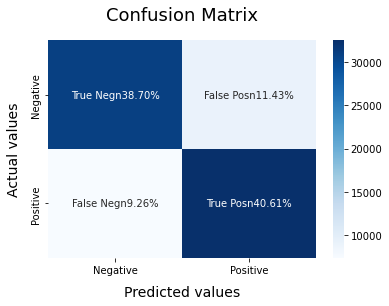

In [48]:
# MODEL - 1 : Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

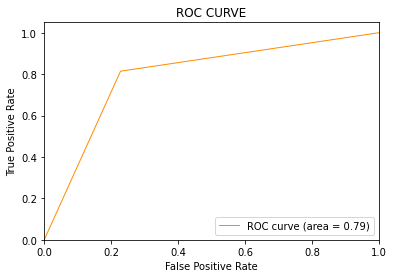

In [49]:
# MODEL - 1 : ROC - AUC curve - binary classifier - The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc = "lower right")
plt.show()

C:\Users\Manav Singh\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.79      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



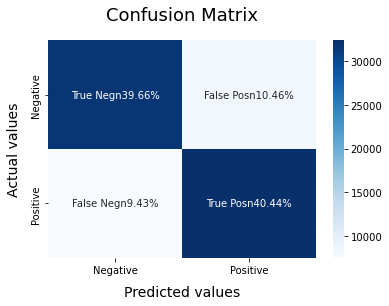

In [50]:
# Model - 2 - SVM (Support Vector Machine) 
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

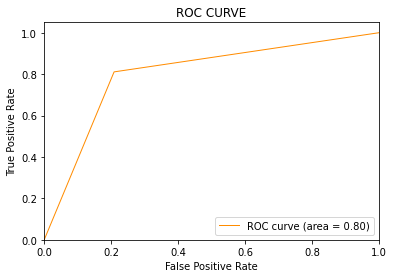

In [51]:
# MODEL - 2 : ROC - AUC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     40100
           1       0.81      0.83      0.82     39900

    accuracy                           0.81     80000
   macro avg       0.81      0.81      0.81     80000
weighted avg       0.81      0.81      0.81     80000



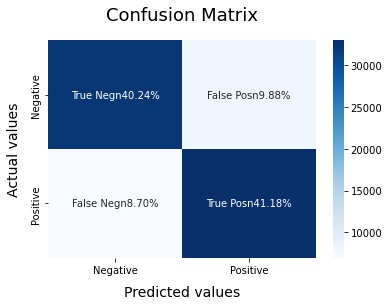

In [52]:
# Model 3 - Logistic Regression
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

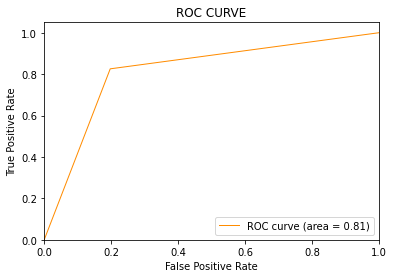

In [53]:
# MODEL - 3 : ROC - AUC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [54]:
#test_data = ["My whole body feels itchy and like its on fire"]
#df1 = LRmodel.transform(test_data).toarray()
#LRmodel.predict(df1)